In [ ]:
#to find the mean and constant for linear equation
import numpy as np
def LinearReg(X,y):
    x_m=np.mean(X)
    y_m=np.mean(y)
    num=0
    den=0
    n=len(X)
    for i in range(n):
        num+=(X[i]-x_m)*(y[i]-y_m)
        den+=(X[i]-x_m)**2
    m=num/den
    c=y_m-m*x_m
    return m,c


X=[1,2,3,4,5]
y=[2,4,3,4,5]
m,c=LinearReg(X,y)
print(f"y={m}X+{c}")

y=0.6X+1.8000000000000003


In [ ]:
def Predict(X):
  yp=[]
  for i in range(len(X)):
    yp.append(m*X[i]+c)
  return yp
y_p=Predict(X)
y_p

[2.4000000000000004, 3.0, 3.6, 4.2, 4.800000000000001]

In [ ]:
def r2score(y,y_p):
  ym=np.mean(y)
  print(ym)
  num=0
  den=0
  for i in range(len(y)):
    num=num+(y[i]-y_p[i])**2
    den=den+(y[i]-ym)**2
  r2=1-(num/den)
  return r2
r2score(y,y_p)

3.6


0.6923076923076923

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


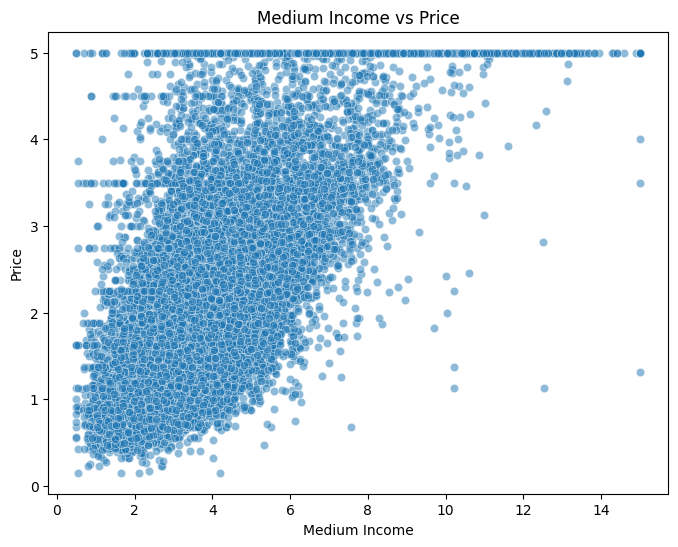

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


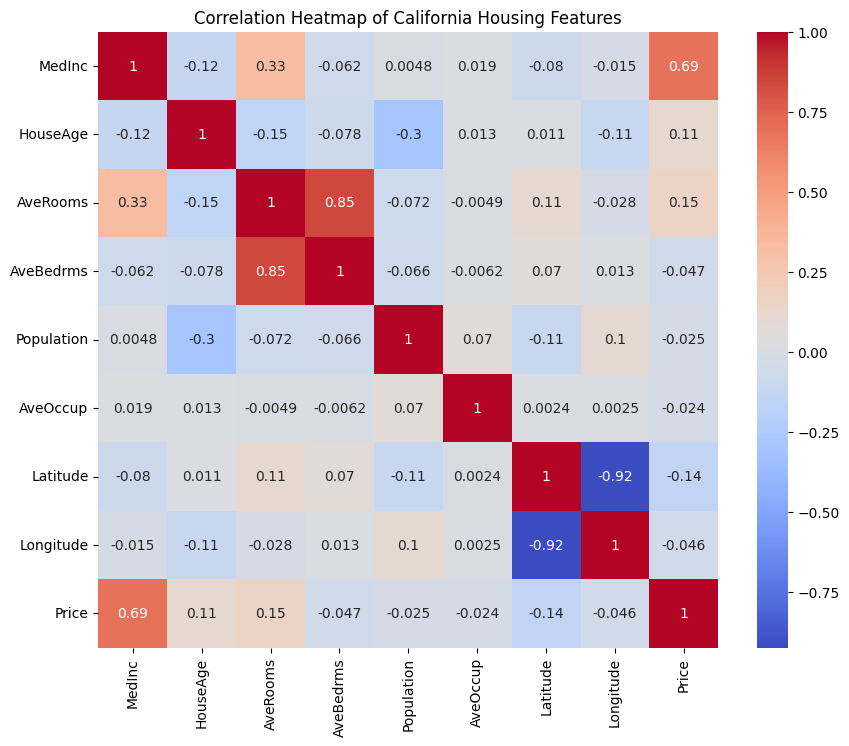

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Medium Income vs Price')
plt.xlabel('Medium Income')
plt.ylabel('Price')
plt.show()
print(df.corr()['Price'].sort_values())
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap of California Housing Features')
plt.show()

In [ ]:
X=df['MedInc']
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train)
print(f'\n Linear Equation: y={model.coef_[0]:.2f}X+{model.intercept_:.2f}')
y_pred=model.predict(X_test.values.reshape(-1,1))
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f'\n Mean Squared Error: {mae:.2f}')
print(f'\n Root Mean Squared Error: {rmse:.2f}')
print(f'\n Root Squared Error: {r2:.2f}')



 Linear Equation: y=0.42X+0.44

 Mean Squared Error: 0.71

 Root Mean Squared Error: 0.84

 Root Squared Error: 0.46


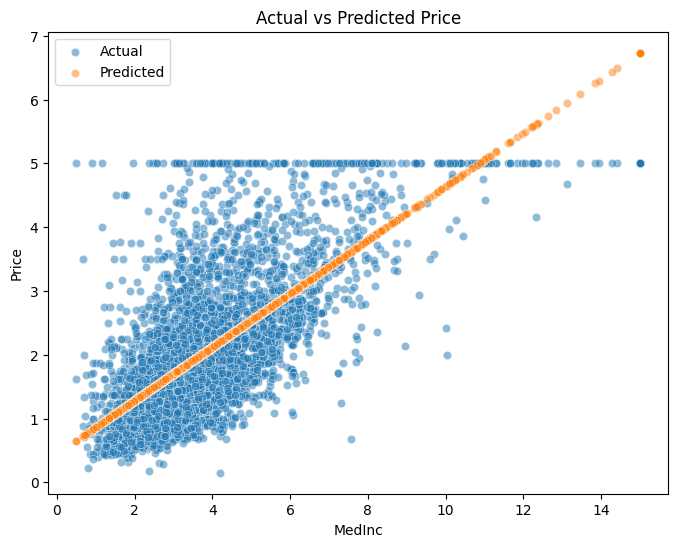

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test,y=y_test,alpha=0.5,label='Actual')
sns.scatterplot(x=X_test,y=y_pred,alpha=0.5,label='Predicted')
plt.title('Actual vs Predicted Price')
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:

residuals=y_test-y_pred
print("\nFirst 5 Residuals:")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 Residuals:
        Actual  Predicted  Residual
20046  0.47700   1.149589 -0.672589
3024   0.45800   1.506069 -1.048069
15663  5.00001   1.903937  3.096073
20484  2.18600   2.850594 -0.664594
9814   2.78000   2.006633  0.773367


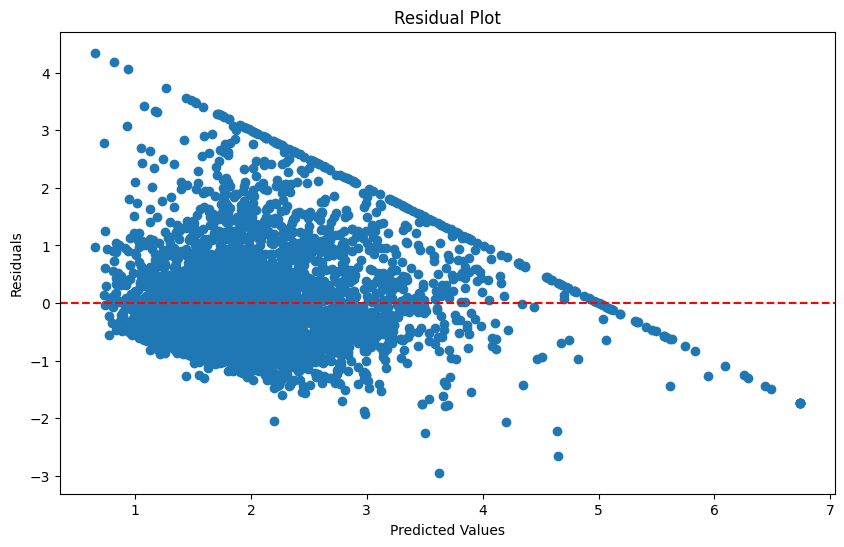

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

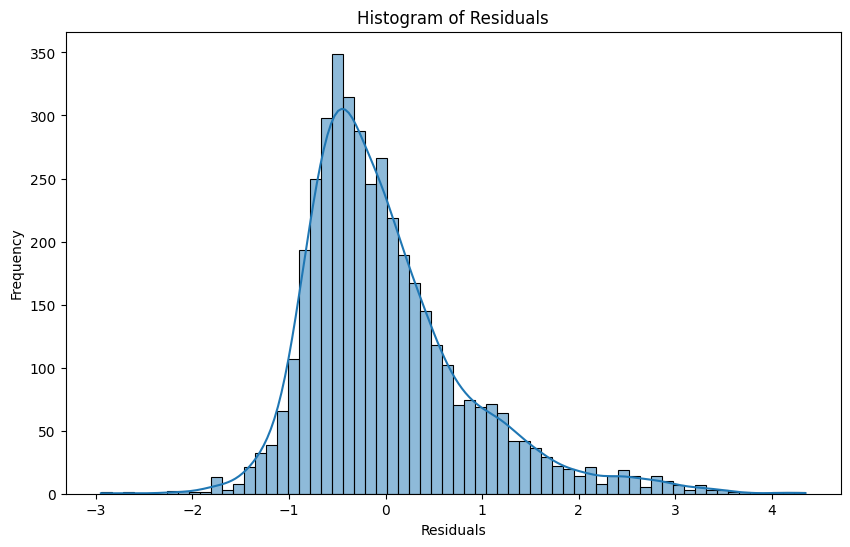

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


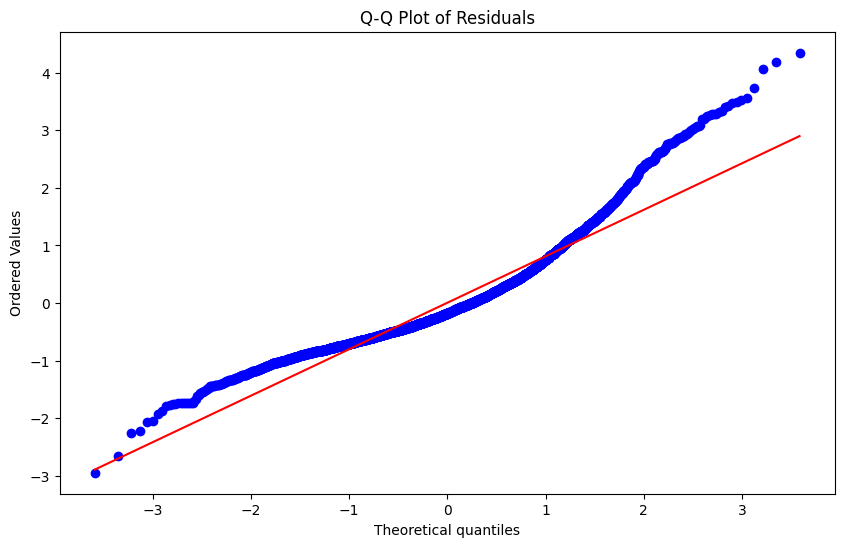

In [ ]:
plt.figure(figsize=(10,6))
stats.probplot(residuals,plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=100,n_features=2,noise=50)
kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()
scores=cross_val_score(model,X,y,scoring='r2',cv=kf)
print(f"Cross-validation scores:{scores}")
print(f"Average scores:{scores.mean():.2f}")
print(scores.mean())


Cross-validation scores:[0.75171801 0.77125462 0.77782115 0.53487433 0.70379033]
Average scores:0.71
0.7078916891298466


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
da=pd.read_csv('/content/black-friday.csv')



            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

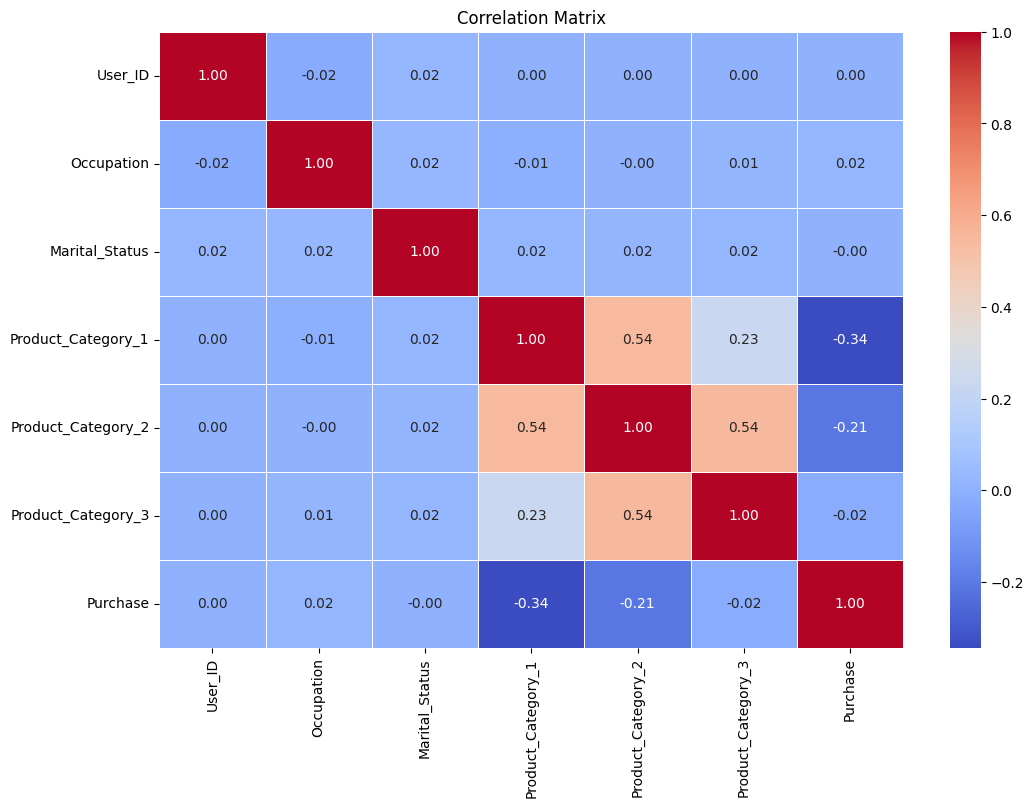

In [ ]:
# Check summary statistics
print(da.describe())

# Check for correlations
# Select only numeric columns
numeric_df = da.select_dtypes(include=[np.number])

# Check for correlations
print(numeric_df.corr())


plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



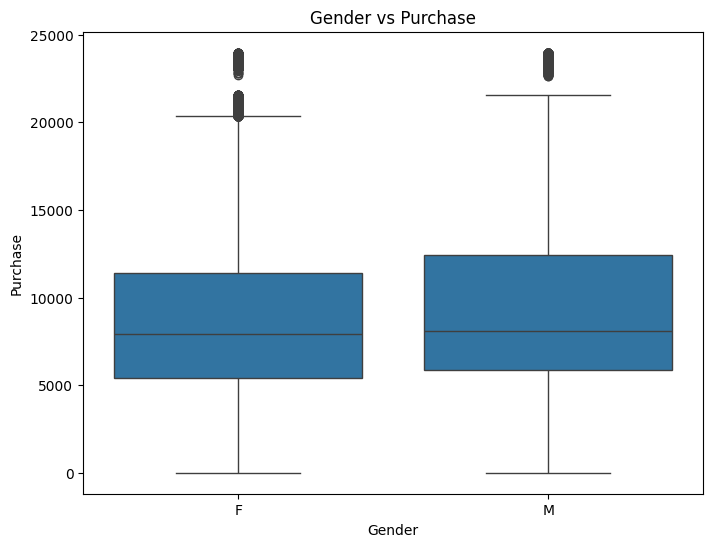

<ipython-input-5-79e842b58105>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category_1', y='Purchase', data=da, palette='viridis')


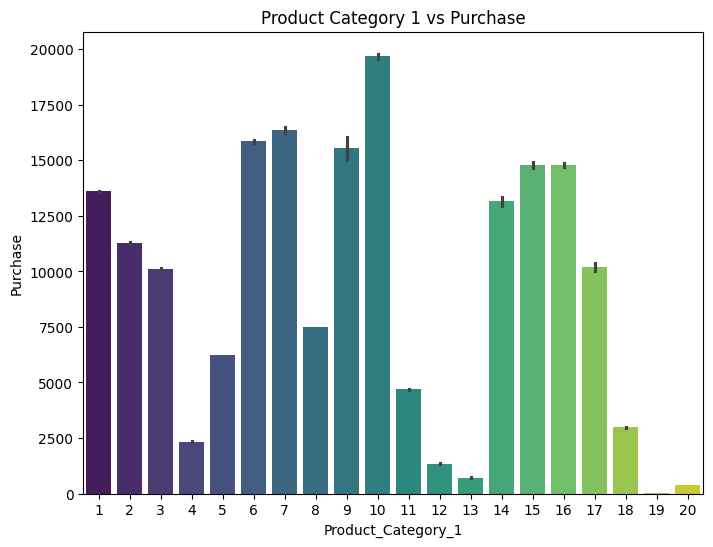

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


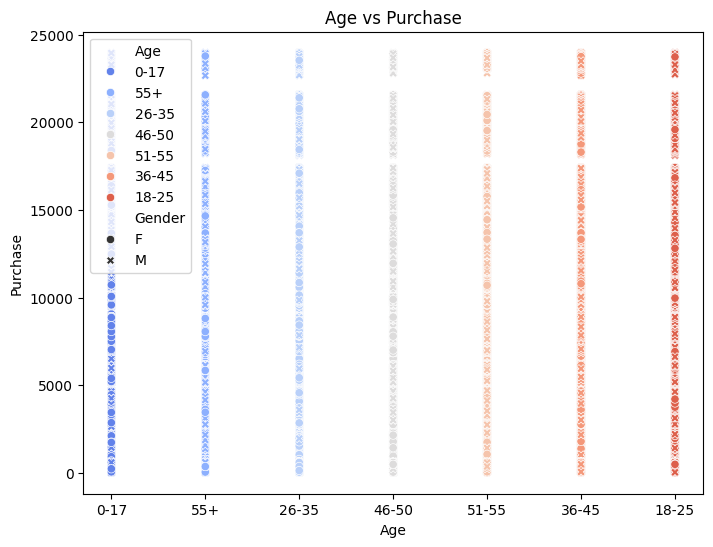

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Boxplot for 'Gender vs Purchase'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase', data=da)
plt.title('Gender vs Purchase')
plt.show()

# 2. Barplot for 'Product_Category_1 vs Purchase'
plt.figure(figsize=(8, 6))
sns.barplot(x='Product_Category_1', y='Purchase', data=da, palette='viridis')
plt.title('Product Category 1 vs Purchase')
plt.show()

# 3. Scatterplot for 'Age vs Purchase'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Purchase', data=da, palette='coolwarm', hue='Age', style='Gender')
plt.title('Age vs Purchase')
plt.show()





Age groups show varying purchase patterns.
Gender may have some influence on purchase behavior.
Product categories likely have a significant effect on purchase amounts.

In [ ]:
# Selecting features and the target variable
X = da.drop(columns=['User_ID', 'Product_ID', 'Purchase'])  # Drop irrelevant columns
y = da['Purchase']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

# Assume 'da' is your cleaned dataframe (ensure 'da' is already loaded)

# Step 1: One-Hot Encoding for categorical features
da_encoded = pd.get_dummies(da, drop_first=True)  # Drop the first category to avoid multicollinearity

# Step 2: Define features (X) and target variable (y)
X = da_encoded.drop(columns=['Purchase'])  # Drop the target variable 'Purchase'
y = da_encoded['Purchase']  # Target variable 'Purchase'

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha value
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha value

# Step 5: Train the models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Step 6: Predict on the test data
lr_preds = lr_model.predict(X_test)
ridge_preds = ridge_model.predict(X_test)
lasso_preds = lasso_model.predict(X_test)

# Step 7: Calculate R² score for each model
lr_r2 = r2_score(y_test, lr_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

# Step 8: Print the R² scores
print(f"Linear Regression R²: {lr_r2:.2f}")
print(f"Ridge Regression R²: {ridge_r2:.2f}")
print(f"Lasso Regression R²: {lasso_r2:.2f}")

# Step 9: Find the best model based on R² score
best_model = max(lr_r2, ridge_r2, lasso_r2)
if best_model == lr_r2:
    print("Linear Regression is the best model.")
elif best_model == ridge_r2:
    print("Ridge Regression is the best model.")
else:
    print("Lasso Regression is the best model.")


NameError: name 'da' is not defined

In [ ]:
# Visualize R² scores for all three models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
r2_scores = [lr_r2, ridge_r2, lasso_r2]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=r2_scores, palette='Blues_d')
plt.title('Comparison of Models - R² Scores')
plt.ylabel('R² Score')
plt.show()


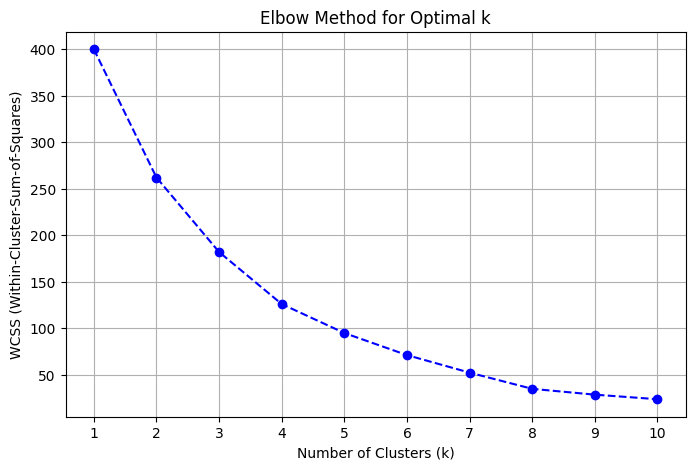

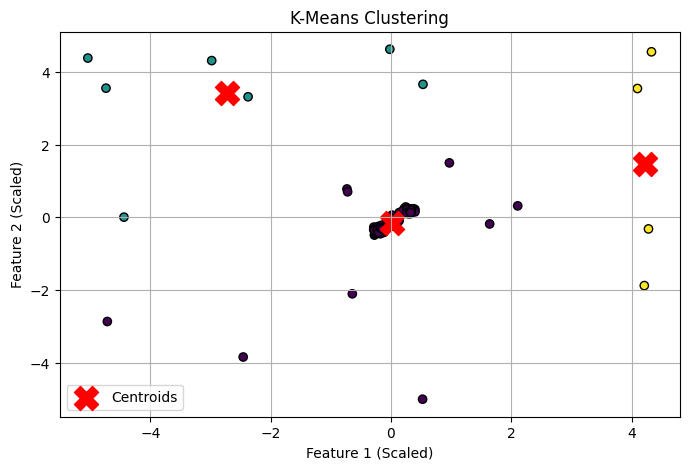

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/kmeans_dataset_with_outliers.csv')
X = df[['X', 'Y']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()








Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]

Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 2
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1


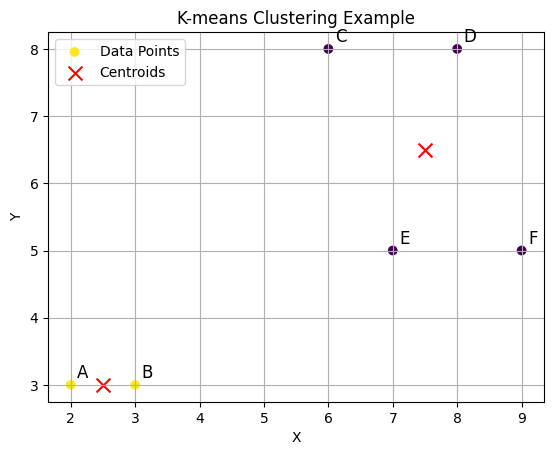

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the data points (A, B, C, D, E, F)
data = np.array([
    [2, 3],  # Point A
    [3, 3],  # Point B
    [6, 8],  # Point C
    [8, 8],  # Point D
    [7, 5],  # Point E
    [9, 5]   # Point F
])

# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)

print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {chr(65+i)}: Cluster {label+1}")

# Plot the data points and the centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

# Annotate points
for i, point in enumerate(data):
    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)

plt.title('K-means Clustering Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
x=np.array([[1,2],[1,4],[1,0],
           [4,2],[4,4],[4,0]])
clustering= AgglomerativeClustering(n_clusters=2).fit(x)
print(clustering.labels_)

[1 1 1 0 0 0]


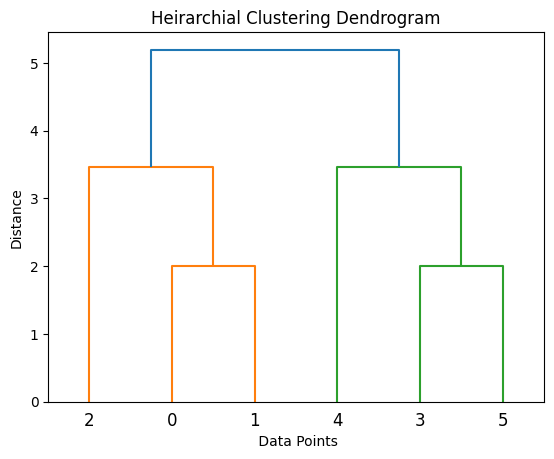

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
x=np.array([[1,2],[1,4],[1,0],
           [4,2],[4,4],[4,0]])
z=linkage(x,'ward')
dendrogram(z)
plt.title('Heirarchial Clustering Dendrogram')
plt.xlabel(' Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
import pandas as pd

file_path_new = '/content/marketing_campaign1.csv'
df_new = pd.read_csv(file_path_new, delimiter=",")


df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<ipython-input-33-888148b793dd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["Income"].fillna(df_new["Income"].median(), inplace=True)


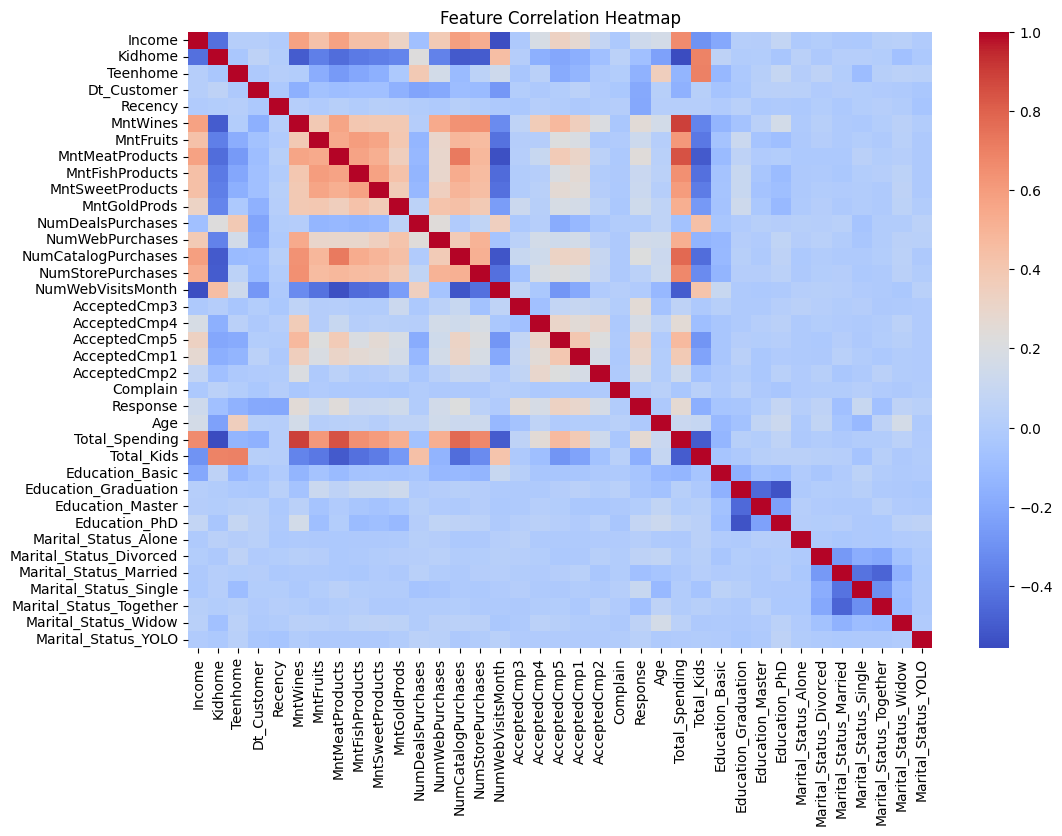

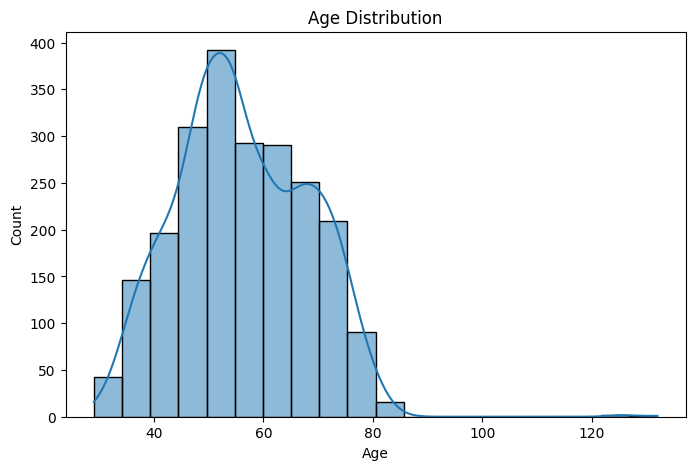

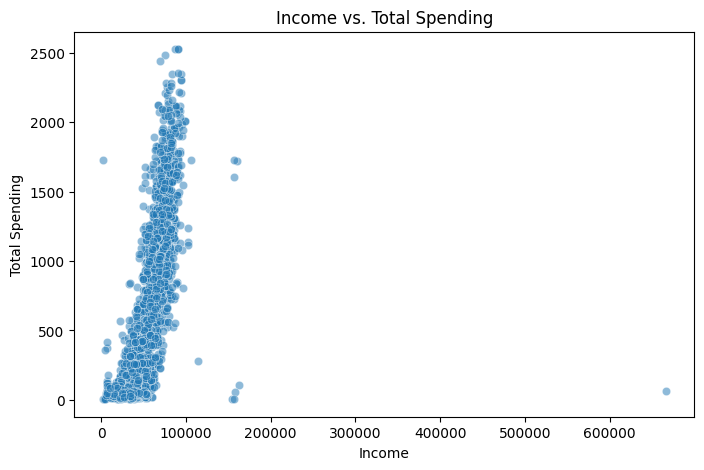

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Income                   2240 non-null   float64       
 1   Kidhome                  2240 non-null   int64         
 2   Teenhome                 2240 non-null   int64         
 3   Dt_Customer              2240 non-null   datetime64[ns]
 4   Recency                  2240 non-null   int64         
 5   MntWines                 2240 non-null   int64         
 6   MntFruits                2240 non-null   int64         
 7   MntMeatProducts          2240 non-null   int64         
 8   MntFishProducts          2240 non-null   int64         
 9   MntSweetProducts         2240 non-null   int64         
 10  MntGoldProds             2240 non-null   int64         
 11  NumDealsPurchases        2240 non-null   int64         
 12  NumWebPurchases          2240 non-

In [ ]:

# Convert Dt_Customer to datetime format
df_new["Dt_Customer"] = pd.to_datetime(df_new["Dt_Customer"], format="%d-%m-%Y")

# Fill missing values in Income with the median
df_new["Income"].fillna(df_new["Income"].median(), inplace=True)

# Create an Age column
df_new["Age"] = 2025 - df_new["Year_Birth"]

# Create a total spending feature
spending_columns = [
    "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
    "MntSweetProducts", "MntGoldProds"
]
df_new["Total_Spending"] = df_new[spending_columns].sum(axis=1)

# Create a total kids feature
df_new["Total_Kids"] = df_new["Kidhome"] + df_new["Teenhome"]

# Drop unnecessary columns
df_new.drop(columns=["ID", "Year_Birth", "Z_CostContact", "Z_Revenue"], inplace=True)

# Encode categorical variables
df_new = pd.get_dummies(df_new, columns=["Education", "Marital_Status"], drop_first=True)

# EDA - Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_new.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# EDA - Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_new["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# EDA - Income vs. Total Spending
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_new["Income"], y=df_new["Total_Spending"], alpha=0.5)
plt.title("Income vs. Total Spending")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.show()

# Display cleaned dataset info
print(df_new.info())
print(df_new.head())

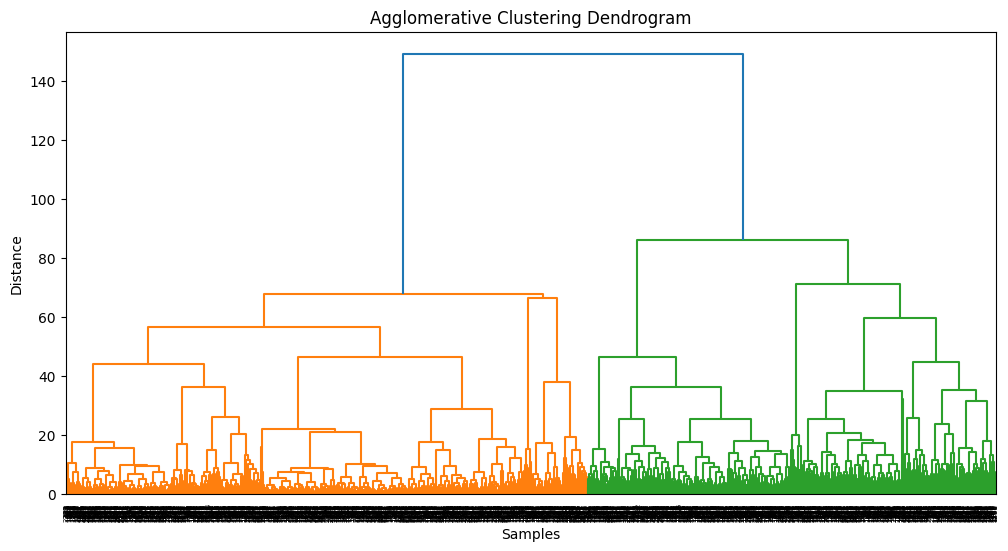

Agglomerative_Cluster
4    1104
2     488
1     465
0     153
3      30
Name: count, dtype: int64


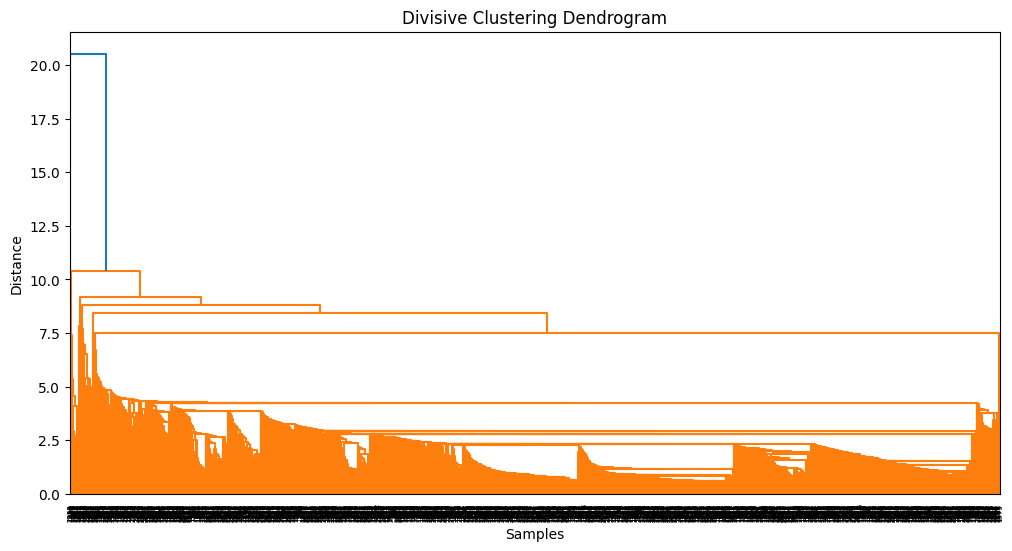

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Income                   2240 non-null   float64       
 1   Kidhome                  2240 non-null   int64         
 2   Teenhome                 2240 non-null   int64         
 3   Dt_Customer              2240 non-null   datetime64[ns]
 4   Recency                  2240 non-null   int64         
 5   MntWines                 2240 non-null   int64         
 6   MntFruits                2240 non-null   int64         
 7   MntMeatProducts          2240 non-null   int64         
 8   MntFishProducts          2240 non-null   int64         
 9   MntSweetProducts         2240 non-null   int64         
 10  MntGoldProds             2240 non-null   int64         
 11  NumDealsPurchases        2240 non-null   int64         
 12  NumWebPurchases          2240 non-

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler



# Create a total spending feature
spending_columns = [
    "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
    "MntSweetProducts", "MntGoldProds"
]
df_new["Total_Spending"] = df_new[spending_columns].sum(axis=1)

# Create a total kids feature
df_new["Total_Kids"] = df_new["Kidhome"] + df_new["Teenhome"]




# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new.select_dtypes(include=['number']))

# Agglomerative Clustering - Dendrogram
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_new['Agglomerative_Cluster'] = agg_clustering.fit_predict(df_scaled)

# Display clusters
print(df_new['Agglomerative_Cluster'].value_counts())

# Divisive Clustering - Dendrogram
linked_div = linkage(df_scaled, method='single')
plt.figure(figsize=(12, 6))
dendrogram(linked_div)
plt.title("Divisive Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Display cleaned dataset info
print(df_new.info())
print(df_new.head())


